In [8]:
import pandas as pd
import psycopg2
from psycopg2 import Error
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    connection = psycopg2.connect(user="lvf7916",
                                  password="xxx",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="everything2023")

    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

In [3]:
tx = pd.read_sql("SELECT * FROM group_5.trnsact LIMIT 10000000;", connection);
tx

/var/folders/6r/cwd2y27x0yq0d6dg5cj_ndb00000gn/T/ipykernel_2940/4118874031.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tx = pd.read_sql("SELECT * FROM group_5.trnsact LIMIT 10000000;", connection);


,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,8024418,4209,730,3800,0,2004-12-16,P,1,159.0,99.99,99.99,387700061,556
1,8024418,4302,140,2500,19708966,2004-11-11,P,1,159.0,159.00,159.00,27500046,556
2,8024418,4803,390,1600,684308624,2005-01-29,P,1,159.0,55.99,55.99,326100068,556
3,8024418,4902,310,1800,0,2005-02-01,P,1,159.0,39.75,39.75,164700025,556
4,8024418,4903,350,4300,0,2005-01-01,P,1,159.0,79.50,79.50,366600063,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,8887898,1807,490,1100,0,2005-05-05,R,1,29.5,29.50,29.50,727400041,731
9999996,8887898,1904,691,700,0,2005-07-17,P,1,29.5,14.75,14.75,369300034,731
9999997,8887898,2104,380,400,614708586,2005-05-11,P,1,29.5,22.12,22.12,673500036,731
9999998,8887898,2203,271,5600,587300436,2005-05-28,P,1,29.5,22.12,22.12,332900069,731


In [4]:
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 

PostgreSQL connection is closed


In [5]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SKU       int64  
 1   STORE     int64  
 2   REGISTER  int64  
 3   TRANNUM   int64  
 4   SEQ       object 
 5   SALEDATE  object 
 6   STYPE     object 
 7   QUANTITY  int64  
 8   ORGPRICE  float64
 9   SPRICE    float64
 10  AMT       float64
 11  INTERID   object 
 12  MIC       int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 991.8+ MB


## Check Missing Values

In [6]:
tx.isnull().sum()/tx.shape[0]*100

SKU         0.0
STORE       0.0
REGISTER    0.0
TRANNUM     0.0
SEQ         0.0
SALEDATE    0.0
STYPE       0.0
QUANTITY    0.0
ORGPRICE    0.0
SPRICE      0.0
AMT         0.0
INTERID     0.0
MIC         0.0
dtype: float64

/var/folders/6r/cwd2y27x0yq0d6dg5cj_ndb00000gn/T/ipykernel_2940/945074440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tx.corr(), annot=True)


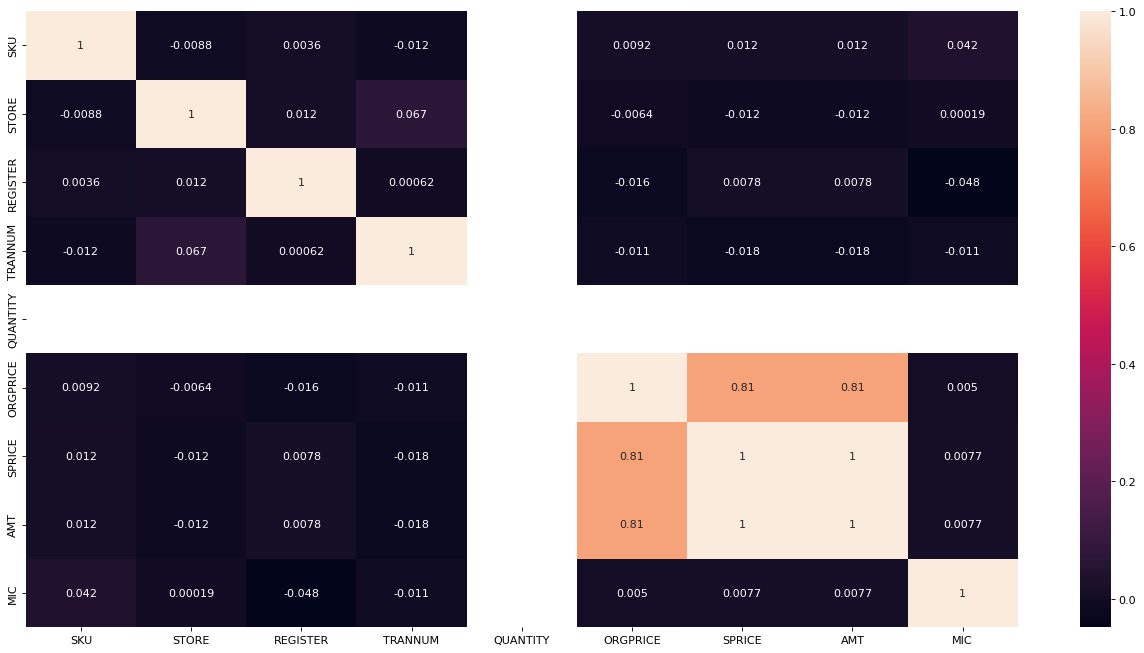

In [9]:
plt.figure(figsize = (20, 10), dpi = 80)
sns.heatmap(tx.corr(), annot=True)
plt.show()

## EDA for other columns

In [16]:
def analyze_counts(df, top_n=20):
    # Calculate classid counts and sort
    top_sku_count = tx['SKU'].value_counts().head(20)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a color palette for the bars
    colors = plt.cm.viridis_r(range(len(top_sku_count)))

    # Create the bar plot with customized aesthetics
    top_sku_count.head(top_n).plot(kind='bar', rot=45, ax=ax, color=colors)

    # Add counts on top of bars with custom formatting
    for i, count in enumerate(top_sku_count.head(top_n)):
        ax.text(i, count + 10, str(count), ha='center', fontsize=6, color='purple')

    # Set the title, labels, and adjust font size
    ax.set_title(f"Top {top_n} SKUs", fontsize=14)
    ax.set_xlabel('SKU', fontsize=12)
    ax.set_ylabel(f"No. of SKUs in Transactions", fontsize=12)

    # Customize the grid
    ax.yaxis.grid(linestyle='--', alpha=0.7)

    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Customize the x-axis and y-axis tick labels
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Show the plot
    plt.tight_layout()
    plt.show()

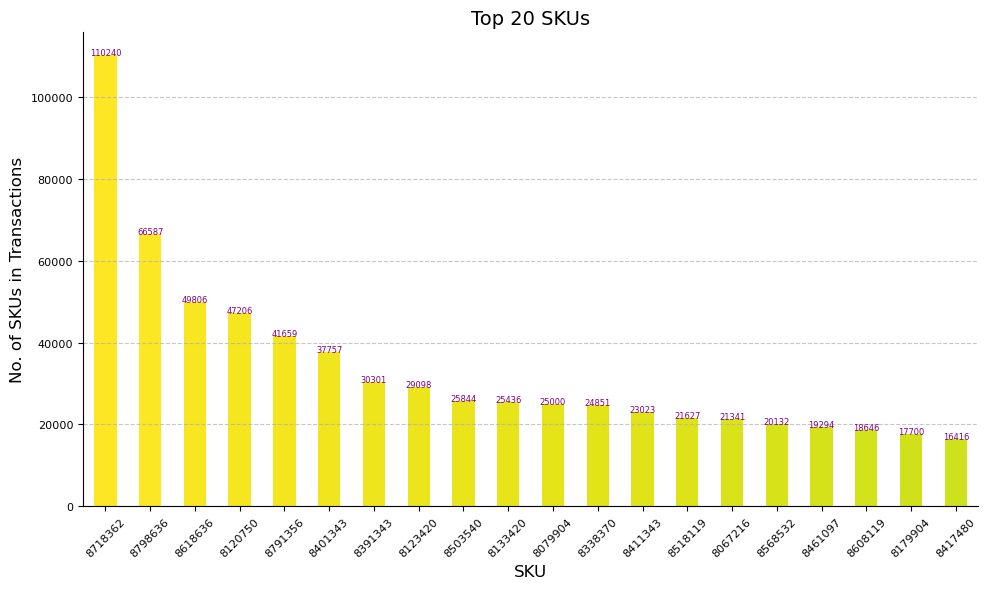

In [17]:
analyze_counts(tx)

In [19]:
tx

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,8024418,4209,730,3800,0,2004-12-16,P,1,159.0,99.99,99.99,387700061,556
1,8024418,4302,140,2500,19708966,2004-11-11,P,1,159.0,159.00,159.00,27500046,556
2,8024418,4803,390,1600,684308624,2005-01-29,P,1,159.0,55.99,55.99,326100068,556
3,8024418,4902,310,1800,0,2005-02-01,P,1,159.0,39.75,39.75,164700025,556
4,8024418,4903,350,4300,0,2005-01-01,P,1,159.0,79.50,79.50,366600063,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,8887898,1807,490,1100,0,2005-05-05,R,1,29.5,29.50,29.50,727400041,731
9999996,8887898,1904,691,700,0,2005-07-17,P,1,29.5,14.75,14.75,369300034,731
9999997,8887898,2104,380,400,614708586,2005-05-11,P,1,29.5,22.12,22.12,673500036,731
9999998,8887898,2203,271,5600,587300436,2005-05-28,P,1,29.5,22.12,22.12,332900069,731


In [27]:
tx_date = tx.groupby('SALEDATE').agg({
    'SKU': countUnique,
    'TRANNUM': countUnique,
    'QUANTITY': 'sum',
    'ORGPRICE': 'sum'
}).reset_index()

<Axes: title={'center': "Number of Different SKU's Sold"}, xlabel='SALEDATE'>

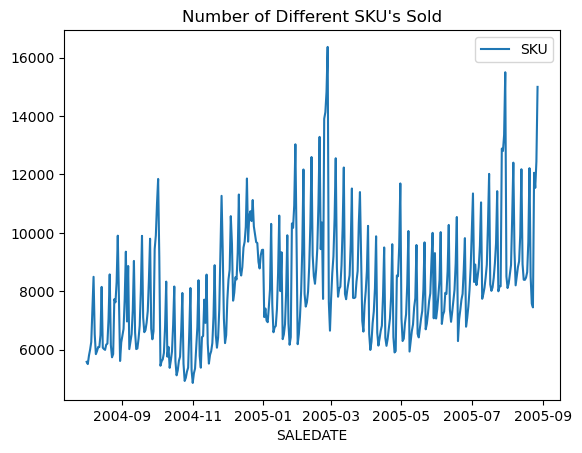

In [28]:
tx_date.plot.line(x = "SALEDATE", y = "SKU", 
                  title = "Number of Different SKU's Sold")

<Axes: title={'center': 'Number of Products Sold'}, xlabel='SALEDATE'>

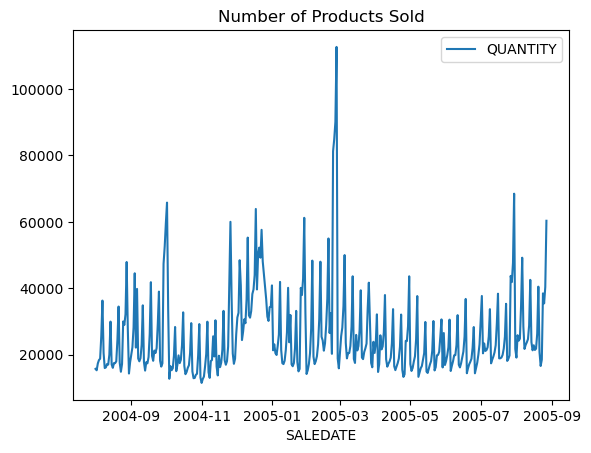

In [31]:
tx_date.plot.line(x = "SALEDATE", y = "QUANTITY",
                  title = "Number of Products Sold")